In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np # linear algebra
from matplotlib import pyplot as plt
import cv2
import cv2.ml
import os
import os.path
from tqdm import tqdm

from skimage import exposure

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cwd = os.getcwd()

In [0]:
def find_real_contour(a):
    cp = []
    for i in range(len(a)):
        max_ = len(a[i]) > 100 
        if len(a[i]) > 100 and len(a[i]) >= max_:
            cp = a[i].flatten().reshape(-1,2)
    return cp
def my_rec_draw(img,cp):
    xmin = np.argmin(cp[:,0])
    xmax = np.argmax(cp[:,0])
    ymin = np.argmin(cp[:,1])
    ymax =np.argmax(cp[:,1])
    x,y = (cp[xmin][0],cp[ymin][1])
    w,h = (cp[xmax][0]-cp[xmin][0],cp[ymax][1]-cp[ymin][1])
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    return img,(x,y,w,h)

In [0]:
def processing(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(0,0),fx=0.2,fy=0.2)
    image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    image_grayed = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    image_grayed = cv2.GaussianBlur(image_grayed, (5,5),0)
    ret,thresh = cv2.threshold(image_grayed,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((5,5),np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    
    img_inversed = cv2.bitwise_not(opening)
    img_grayed_mask = cv2.bitwise_and(image_grayed,image_grayed,mask = img_inversed)
    
    img_color_mask = cv2.bitwise_and(image,image,mask = img_inversed)
#     cv2.imshow("temp",image)
    contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     cv2.drawContours(image,contours,-1,(0,0,0),2)
    cp = find_real_contour(contours)
    cp = np.array(cp)
    
    img,coors = my_rec_draw(image.copy(),cp)
    x,y,w,h = coors
    crop = image[y:y+h,x:x+w,:].copy()
    edges = cv2.Canny(img_inversed,100,200)
    
    
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    
#     feat_vec.append((w/h,perimeter/area,path.split("\\")[-2]))
#     cv2.imshow(path.split("\\")[-2]+"normal",opening)
#     cv2.imshow(path.split("\\")[-2],crop)
#     cv2.imshow("img",img)
#     cv2.waitKey()
#     cv2.destroyAllWindows()
    return crop

In [6]:
parent_directory = "/content/drive/My Drive/Folio Leaf Dataset/Folio Leaf Dataset/Folio"
spec_names =  os.listdir(parent_directory)
spec_names.sort()

/content/drive/My Drive/Folio Leaf Dataset/Folio Leaf Dataset/Folio


In [8]:
spec_names[0]

'ashanti blood'

In [0]:
all_spec_dir = list(os.path.join(parent_directory,x)  for x in spec_names )
spec_img_dirs = []
for i in range(len(all_spec_dir)):
    spec_imgs = os.listdir(all_spec_dir[i])
    temp = list(os.path.join(all_spec_dir[i],x) for x in spec_imgs)
    spec_img_dirs.append({spec_names[i]:temp})

In [10]:
spec_img_dirs[0]

{'ashanti blood': ['/content/drive/My Drive/Folio Leaf Dataset/Folio Leaf Dataset/Folio/ashanti blood/20150324_153329.jpg',
  '/content/drive/My Drive/Folio Leaf Dataset/Folio Leaf Dataset/Folio/ashanti blood/20150324_153348.jpg',
  '/content/drive/My Drive/Folio Leaf Dataset/Folio Leaf Dataset/Folio/ashanti blood/20150324_153451.jpg',
  '/content/drive/My Drive/Folio Leaf Dataset/Folio Leaf Dataset/Folio/ashanti blood/20150324_153805.jpg',
  '/content/drive/My Drive/Folio Leaf Dataset/Folio Leaf Dataset/Folio/ashanti blood/20150324_153819.jpg',
  '/content/drive/My Drive/Folio Leaf Dataset/Folio Leaf Dataset/Folio/ashanti blood/20150324_155837.jpg',
  '/content/drive/My Drive/Folio Leaf Dataset/Folio Leaf Dataset/Folio/ashanti blood/20150324_155848.jpg',
  '/content/drive/My Drive/Folio Leaf Dataset/Folio Leaf Dataset/Folio/ashanti blood/20150324_155907.jpg',
  '/content/drive/My Drive/Folio Leaf Dataset/Folio Leaf Dataset/Folio/ashanti blood/20150324_155923.jpg',
  '/content/drive/My

In [0]:
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (16,16)
nbins = 9
derivAperture = 1
winSigma = 4.0
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)

In [87]:
data2 = []
for i in tqdm(range(len(spec_img_dirs))):
    numbers = len(list(spec_img_dirs[i].values())[0])
    for k in range(numbers):
        path = list(spec_img_dirs[i].values())[0][k]
        image = processing(path)
        image = cv2.resize(image,(128,64))
        hist = hog.compute(image,winStride)
        data2.append(hist.reshape(-1,hist.shape[0]))




  0%|          | 0/32 [00:00<?, ?it/s]


  3%|▎         | 1/32 [00:03<01:59,  3.85s/it]


  6%|▋         | 2/32 [00:07<01:55,  3.85s/it]


  9%|▉         | 3/32 [00:10<01:46,  3.67s/it]


 12%|█▎        | 4/32 [00:15<01:51,  3.98s/it]


 16%|█▌        | 5/32 [00:18<01:35,  3.55s/it]


 19%|█▉        | 6/32 [00:21<01:30,  3.49s/it]


 22%|██▏       | 7/32 [00:23<01:16,  3.07s/it]


 25%|██▌       | 8/32 [00:26<01:12,  3.04s/it]


 28%|██▊       | 9/32 [00:29<01:06,  2.88s/it]


 31%|███▏      | 10/32 [00:32<01:04,  2.93s/it]


 34%|███▍      | 11/32 [00:35<01:02,  2.99s/it]


 38%|███▊      | 12/32 [00:39<01:07,  3.39s/it]


 41%|████      | 13/32 [00:41<00:58,  3.07s/it]


 44%|████▍     | 14/32 [00:45<00:58,  3.23s/it]


 47%|████▋     | 15/32 [00:49<00:59,  3.49s/it]


 50%|█████     | 16/32 [00:52<00:50,  3.18s/it]


 53%|█████▎    | 17/32 [00:55<00:50,  3.39s/it]


 56%|█████▋    | 18/32 [01:00<00:50,  3.63s/it]


 59%|█████▉    | 19/32 [01:04<00:50,  3.88s/it]


 62%|██████▎   

In [12]:
label = []
for i in tqdm(range(len(spec_img_dirs))):
    numbers = len(list(spec_img_dirs[i].values())[0])
    name = list(spec_img_dirs[i].keys())[0]
    label.append(np.array([name] * numbers,dtype=object))
a = np.hstack((label[0],label[1]))
for i in range(2,32):
    a = np.hstack((a,label[i]))

100%|██████████| 32/32 [00:00<00:00, 27979.51it/s]


In [0]:
import pandas as pd
df = pd.DataFrame(np.array(rose_data).reshape(numbers,441))

In [52]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

(756,)


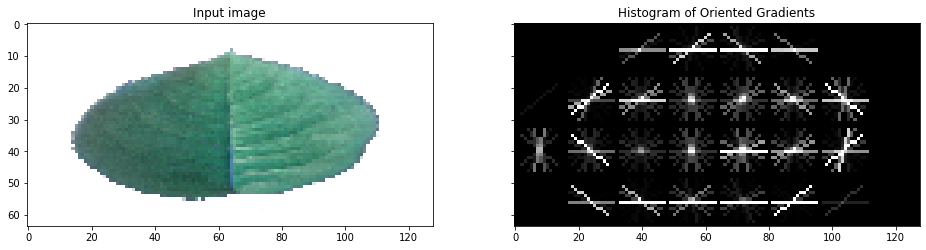

In [13]:
from skimage.feature import hog
from skimage import exposure
image = cv2.imread(list(spec_img_dirs[26].values())[0][0])
image = cv2.resize(image,(128,64))
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(16, 16),cells_per_block=(2, 2), visualize=True, multichannel=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(image, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

print(fd.shape)

In [0]:
df = pd.DataFrame(np.array(data2).reshape(637,data2[0].shape[1]))

In [94]:
np.array(data2).shape

(637, 1, 3969)

In [0]:
import pandas as pd
finish = pd.read_csv("/content/drive/My Drive/Folio Leaf Dataset/temp.csv")

In [31]:
finish

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952,3953,3954,3955,3956,3957,3958,3959,3960,3961,3962,3963,3964,3965,3966,3967,3968
0,0.332779,0.332779,0.332779,0.332779,0.332779,0.332779,0.332779,0.332779,0.332779,0.340118,0.340118,0.340118,0.340118,0.340118,0.266758,0.340118,0.340118,0.340118,0.062995,0.554682,0.554682,0.554682,0.254602,0.012255,0.017031,0.023469,0.040798,0.053089,0.384722,0.457706,0.457706,0.457706,0.275375,0.361374,0.095525,0.023806,0.028341,0.059097,0.087261,0.056966,...,0.418791,0.418791,0.418791,0.418791,0.346143,0.320423,0.283164,0.335984,0.346143,0.346143,0.336285,0.329328,0.346143,0.467313,0.467313,0.467313,0.233822,0.141842,0.130866,0.121644,0.122851,0.467313,0.552634,0.564956,0.564956,0.140413,0.094798,0.095887,0.054680,0.036206,0.091682,0.085745,0.544126,0.544126,0.544126,0.255251,0.119589,0.083787,0.070821,0.086620
1,0.368844,0.368844,0.368844,0.368844,0.368844,0.017091,0.249296,0.342926,0.368844,0.455854,0.455854,0.455854,0.455854,0.315761,0.002859,0.055934,0.051546,0.242357,0.076013,0.548230,0.548230,0.548230,0.290102,0.033563,0.021212,0.020783,0.030209,0.174914,0.255632,0.390692,0.390692,0.390692,0.333473,0.390692,0.390692,0.160463,0.037384,0.014349,0.018311,0.011753,...,0.221809,0.480211,0.480211,0.480211,0.333467,0.333467,0.327213,0.333467,0.333467,0.333467,0.333467,0.333467,0.333467,0.437099,0.437099,0.437099,0.330390,0.288867,0.159800,0.093536,0.067283,0.437099,0.371099,0.563446,0.563446,0.420545,0.192455,0.037203,0.009865,0.010980,0.078848,0.056207,0.486009,0.531049,0.531049,0.399571,0.143428,0.080352,0.049156,0.046945
2,0.395623,0.327020,0.316311,0.041564,0.395623,0.068829,0.395623,0.395623,0.395623,0.390204,0.390204,0.390204,0.112370,0.355417,0.076996,0.334012,0.361421,0.390204,0.177922,0.539911,0.539911,0.539911,0.292892,0.045221,0.014826,0.008017,0.018046,0.082558,0.411135,0.411135,0.411135,0.348089,0.307392,0.411135,0.305889,0.061040,0.037254,0.020780,0.014105,0.041864,...,0.414409,0.414409,0.414409,0.414409,0.341802,0.341802,0.341802,0.341802,0.341802,0.341802,0.248910,0.341802,0.341802,0.545325,0.545325,0.545325,0.091954,0.052229,0.042550,0.053936,0.125070,0.266213,0.132108,0.677027,0.677027,0.160979,0.157928,0.059364,0.033520,0.022506,0.055207,0.246200,0.351643,0.351643,0.351643,0.351643,0.351643,0.351643,0.342479,0.276880
3,0.332779,0.332779,0.332779,0.332779,0.332779,0.332779,0.332779,0.332779,0.332779,0.345215,0.345215,0.345215,0.345215,0.345215,0.207757,0.345215,0.345215,0.345215,0.312393,0.443402,0.465369,0.465369,0.465369,0.035752,0.080270,0.108039,0.179047,0.029300,0.056211,0.444766,0.444766,0.444766,0.444766,0.444766,0.045606,0.019364,0.026938,0.013522,0.063740,0.137069,...,0.470886,0.470886,0.470886,0.470886,0.338027,0.338027,0.338027,0.338027,0.338027,0.338027,0.287269,0.338027,0.338027,0.522905,0.522905,0.522905,0.121186,0.115043,0.089372,0.101385,0.138129,0.330488,0.531688,0.531688,0.531688,0.307637,0.091141,0.025284,0.031361,0.040724,0.200963,0.082896,0.551996,0.551996,0.551996,0.244213,0.075476,0.054525,0.059059,0.041465
4,0.390129,0.390129,0.283929,0.054067,0.390129,0.197630,0.367643,0.359919,0.390129,0.470188,0.470188,0.470188,0.211120,0.136700,0.071179,0.113453,0.172624,0.470188,0.179728,0.668579,0.668579,0.227834,0.096580,0.044750,0.025336,0.018808,0.052843,0.077869,0.465584,0.465584,0.270673,0.299980,0.309441,0.465584,0.269393,0.086044,0.049143,0.020137,0.024958,0.023557,...,0.339923,0.339923,0.339923,0.339923,0.344278,0.344278,0.299463,0.344278,0.344278,0.344278,0.277835,0.344278,0.344278,0.422838,0.422838,0.344445,0.254785,0.124036,0.161350,0.235861,0.422838,0.422838,0.477022,0.477022,0.477022,0.309278,0.166332,0.072570,0.055515,0.123540,0.407010,0.092432,0.494242,0.494242,0.494242,0.494242,0.051044,0.044340,0.028786,0.063402
...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [26]:
finish[:]

(637, 3970)

In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(a)

LabelEncoder()

In [0]:
le.classes_
a_trans = le.transform(a)

In [86]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
clf = SVC(kernel = 'linear', C = 1e5) # just a big number 

X_train , X_test , y_train_tr , y_test_tr = train_test_split(finish,a_trans,test_size = 0.3,random_state = 42)
sta = time.time()
clf.fit(X_train, y_train_tr)
end = time.time()
print("Times",end - sta)
print("Score",clf.score(X_test,y_test_tr))

Times 1.968421220779419
Score 0.9114583333333334


In [85]:
clf = SVC(kernel = 'linear', C = 1e5) 
sta = time.time()
X_train , X_test , y_train , y_test = train_test_split(finish,a,test_size = 0.3,random_state = 42)
clf.fit(X_train, y_train)
end = time.time()
print("Times",end - sta)
print("Score",clf.score(X_test,y_test))

Times 1.980332374572754
Score 0.9114583333333334


In [44]:
X_transform.shape

(637, 258)

In [0]:
import time
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt

Times 0.13798093795776367
Score 0.90625


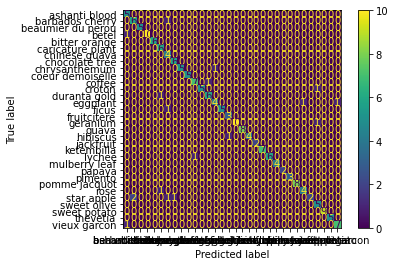

In [88]:
pca = PCA(n_components = 0.95)
X_transform =  pca.fit_transform(finish)
X_train_tr , X_test_tr , y_train , y_test = train_test_split(X_transform,a,test_size = 0.3,random_state = 42)
sta = time.time()
clf = SVC(kernel = 'linear', C = 1e5)
clf.fit(X_train_tr, y_train) 
end = time.time()
print("Times",end - sta)
print("Score",clf.score(X_test_tr,y_test))
plot_confusion_matrix(clf,X_test_tr,y_test)

In [50]:
clf.score(X_test_tr,y_test)

0.90625

In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=32, random_state=0,max_iter = 4000)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=4000,
       n_clusters=32, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [70]:
kmeans.score(X_test)

-4911.716853095687

In [0]:
path = '/content/drive/My Drive/Folio Leaf Dataset/Folio Leaf Dataset/Folio/betel/20150714_110503.jpg'
image = processing(path)
image = cv2.resize(image,(128,64))
hist = hog.compute(image,winStride)

In [37]:
predict = clf.predict(hist.reshape(1,3969))
print(predict)

['betel']


In [122]:
test_data = []
for i in tqdm(range(len(spec_img_dirs))):
    numbers = len(list(spec_img_dirs[i].values())[0])
    for k in range(numbers):
        path = list(spec_img_dirs[i].values())[0][k]
        image = processing(path)
        image = cv2.resize(image,(128,64))
        hist = hog.compute(image,winStride)
        test_data.append(hist.reshape(-1,hist.shape[0]))
        break




  0%|          | 0/32 [00:00<?, ?it/s]


  3%|▎         | 1/32 [00:00<00:08,  3.72it/s]


  6%|▋         | 2/32 [00:00<00:06,  4.29it/s]


  9%|▉         | 3/32 [00:00<00:05,  5.06it/s]


 12%|█▎        | 4/32 [00:00<00:05,  4.73it/s]


 16%|█▌        | 5/32 [00:00<00:05,  5.32it/s]


 19%|█▉        | 6/32 [00:01<00:04,  5.58it/s]


 22%|██▏       | 7/32 [00:01<00:04,  6.19it/s]


 28%|██▊       | 9/32 [00:01<00:03,  7.22it/s]


 31%|███▏      | 10/32 [00:01<00:03,  7.09it/s]


 34%|███▍      | 11/32 [00:01<00:03,  6.96it/s]


 38%|███▊      | 12/32 [00:01<00:02,  6.75it/s]


 41%|████      | 13/32 [00:01<00:02,  7.32it/s]


 44%|████▍     | 14/32 [00:02<00:02,  7.52it/s]


 47%|████▋     | 15/32 [00:02<00:02,  7.22it/s]


 50%|█████     | 16/32 [00:02<00:02,  7.57it/s]


 53%|█████▎    | 17/32 [00:02<00:02,  7.23it/s]


 56%|█████▋    | 18/32 [00:02<00:01,  7.02it/s]


 59%|█████▉    | 19/32 [00:02<00:01,  7.30it/s]


 62%|██████▎   | 20/32 [00:03<00:02,  5.77it/s]


 66%|██████▌  

In [0]:
predict_set =  clf.predict(np.array(test_data).reshape(32,-1))

In [127]:
np.array(test_data).reshape(32,-1).shape

(32, 3969)

In [131]:
print(predict_set)

['ashanti blood' 'barbados cherry' 'beaumier du perou' 'betel'
 'bitter orange' 'caricature plant' 'chinese guava' 'chocolate tree'
 'chrysanthemum' 'coeur demoiselle' 'coffee' 'croton' 'duranta gold'
 'eggplant' 'ficus' 'fruitcitere' 'geranium' 'guava' 'hibiscus'
 'jackfruit' 'ketembilla' 'lychee' 'mulberry leaf' 'papaya' 'pimento'
 'pomme jacquot' 'rose' 'star apple' 'sweet olive' 'sweet potato'
 'thevetia' 'vieux garcon']


In [0]:
df.to_csv('hog_feature.csv')